In [36]:
import sys
import csv

csv.field_size_limit(sys.maxsize)

9223372036854775807

In [37]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('zomato.csv', engine='python', error_bad_lines=False, encoding='utf-8')

Skipping line 17816: unexpected end of data


In [38]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [39]:
df = df.drop(['url', 'phone', 'dish_liked', 'menu_item', 'listed_in(city)'], axis=1)

df = df.rename(columns={'approx_cost(for two people)':'cost',
                        'listed_in(type)':'type'})

df.name = df.name.apply(lambda x:x.title())

df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.'))
df['cost'] = df['cost'].astype(float)

df['rate'].unique()
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')

In [40]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,True,True,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,True,False,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,True,False,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,False,False,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,False,False,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet


In [41]:
df.shape

(16835, 12)

In [42]:
df.columns.values.tolist()

['address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'location',
 'rest_type',
 'cuisines',
 'cost',
 'reviews_list',
 'type']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16835 entries, 0 to 16834
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       16835 non-null  object 
 1   name          16835 non-null  object 
 2   online_order  16835 non-null  bool   
 3   book_table    16835 non-null  bool   
 4   rate          14161 non-null  float64
 5   votes         16835 non-null  int64  
 6   location      16831 non-null  object 
 7   rest_type     16763 non-null  object 
 8   cuisines      16822 non-null  object 
 9   cost          16782 non-null  float64
 10  reviews_list  16835 non-null  object 
 11  type          16835 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(7)
memory usage: 1.3+ MB


In [44]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rate,14161.0,3.682261,0.440305,1.8,3.4,3.7,4.0,4.9
votes,16835.0,271.579329,741.234149,0.0,9.0,46.0,198.0,16345.0
cost,16782.0,363.068568,231.069371,1.0,200.0,350.0,500.0,950.0


In [45]:
df.describe(include=[object]).transpose()

,count,unique,top,freq
address,16835,7060,Delivery Only,36
name,16835,5705,Cafe Coffee Day,34
location,16831,80,HSR,1440
rest_type,16763,85,Quick Bites,6084
cuisines,16822,1974,North Indian,977
reviews_list,16835,8954,[],2153
type,16835,7,Delivery,8580


In [46]:
df.describe(include=[np.bool]).transpose()

,count,unique,top,freq
online_order,16835,2,True,10269
book_table,16835,2,False,14783


In [47]:
def encode_categorical_columns(df):
    columns_to_encode = [col for col in df.columns
                         if col not in ['rate', 'cost', 'votes']]

    for column in columns_to_encode:
        df[column] = df[column].factorize()[0]

    return df

df_encoded = encode_categorical_columns(df.copy())

In [48]:
corr = df_encoded.corr(method='kendall')
corr

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,type
address,1.000000,0.691902,0.127778,0.010159,-0.022714,-0.065692,0.291471,0.006790,0.143227,-0.006306,0.575336,0.035611
name,0.691902,1.000000,0.186373,-0.042210,-0.025469,-0.101260,0.263158,-0.005155,0.202266,-0.074457,0.384139,0.065792
online_order,0.127778,0.186373,1.000000,0.003843,-0.064619,-0.246166,0.022367,0.083064,-0.011376,-0.159721,-0.076528,0.232012
book_table,0.010159,-0.042210,0.003843,1.000000,-0.359645,-0.370049,-0.101007,-0.041849,-0.197491,0.195327,-0.131964,-0.065275
rate,-0.022714,-0.025469,-0.064619,-0.359645,1.000000,0.511199,0.094478,0.097826,0.151498,-0.067168,0.075109,0.002007
votes,-0.065692,-0.101260,-0.246166,-0.370049,0.511199,1.000000,0.059973,-0.057696,0.145902,0.065665,0.234933,-0.001429
location,0.291471,0.263158,0.022367,-0.101007,0.094478,0.059973,1.000000,0.050506,0.127017,-0.047340,0.246512,0.008261
rest_type,0.006790,-0.005155,0.083064,-0.041849,0.097826,-0.057696,0.050506,1.000000,0.011276,-0.217755,0.004994,0.000029
cuisines,0.143227,0.202266,-0.011376,-0.197491,0.151498,0.145902,0.127017,0.011276,1.000000,-0.029078,0.158004,0.029333
cost,-0.006306,-0.074457,-0.159721,0.195327,-0.067168,0.065665,-0.047340,-0.217755,-0.029078,1.000000,0.015208,-0.115765


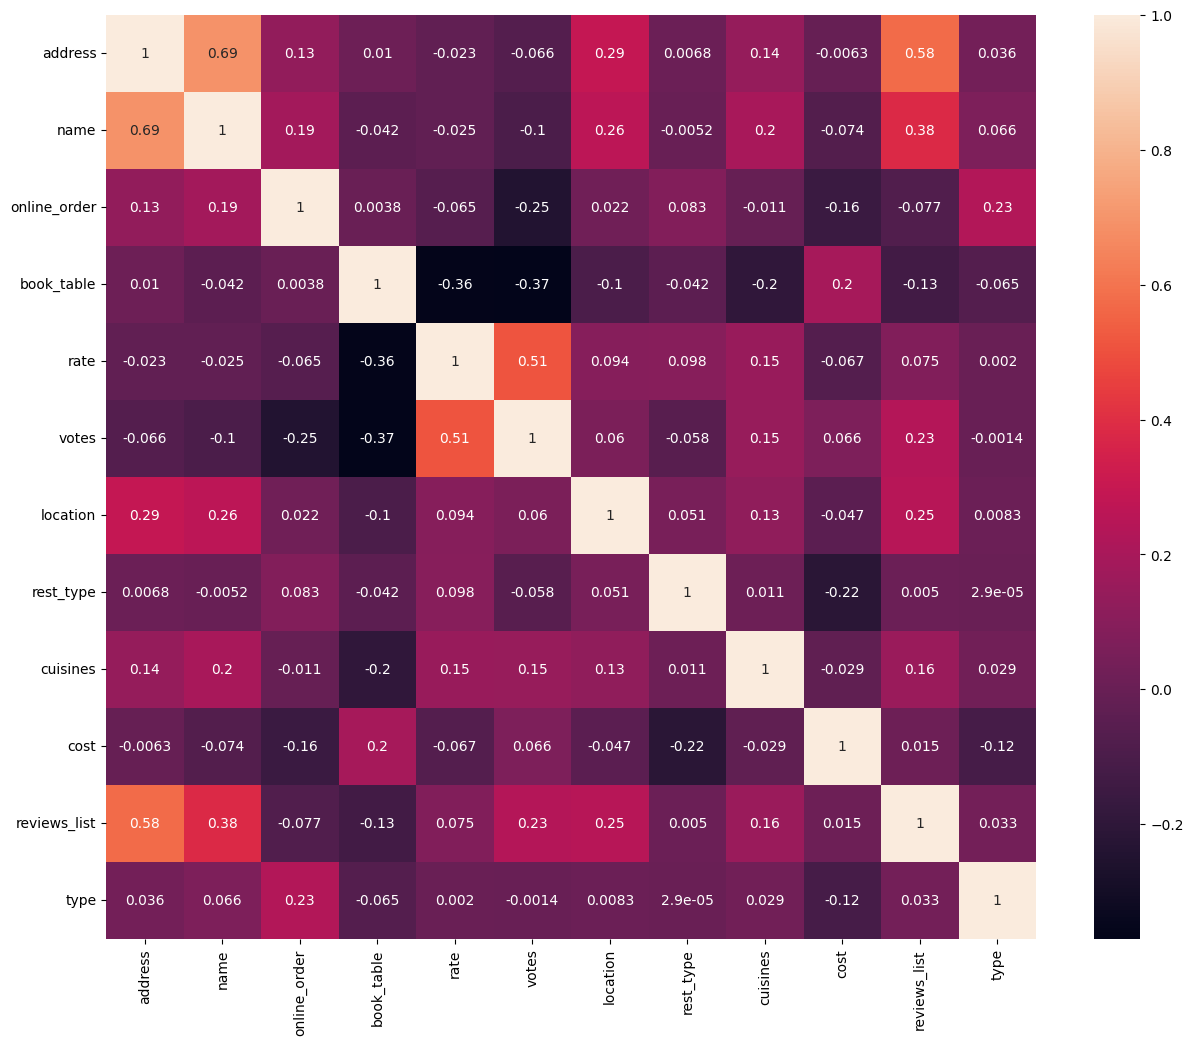

In [49]:
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True)
plt.show()

In [50]:
df.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate            2674
votes              0
location           4
rest_type         72
cuisines          13
cost              53
reviews_list       0
type               0
dtype: int64

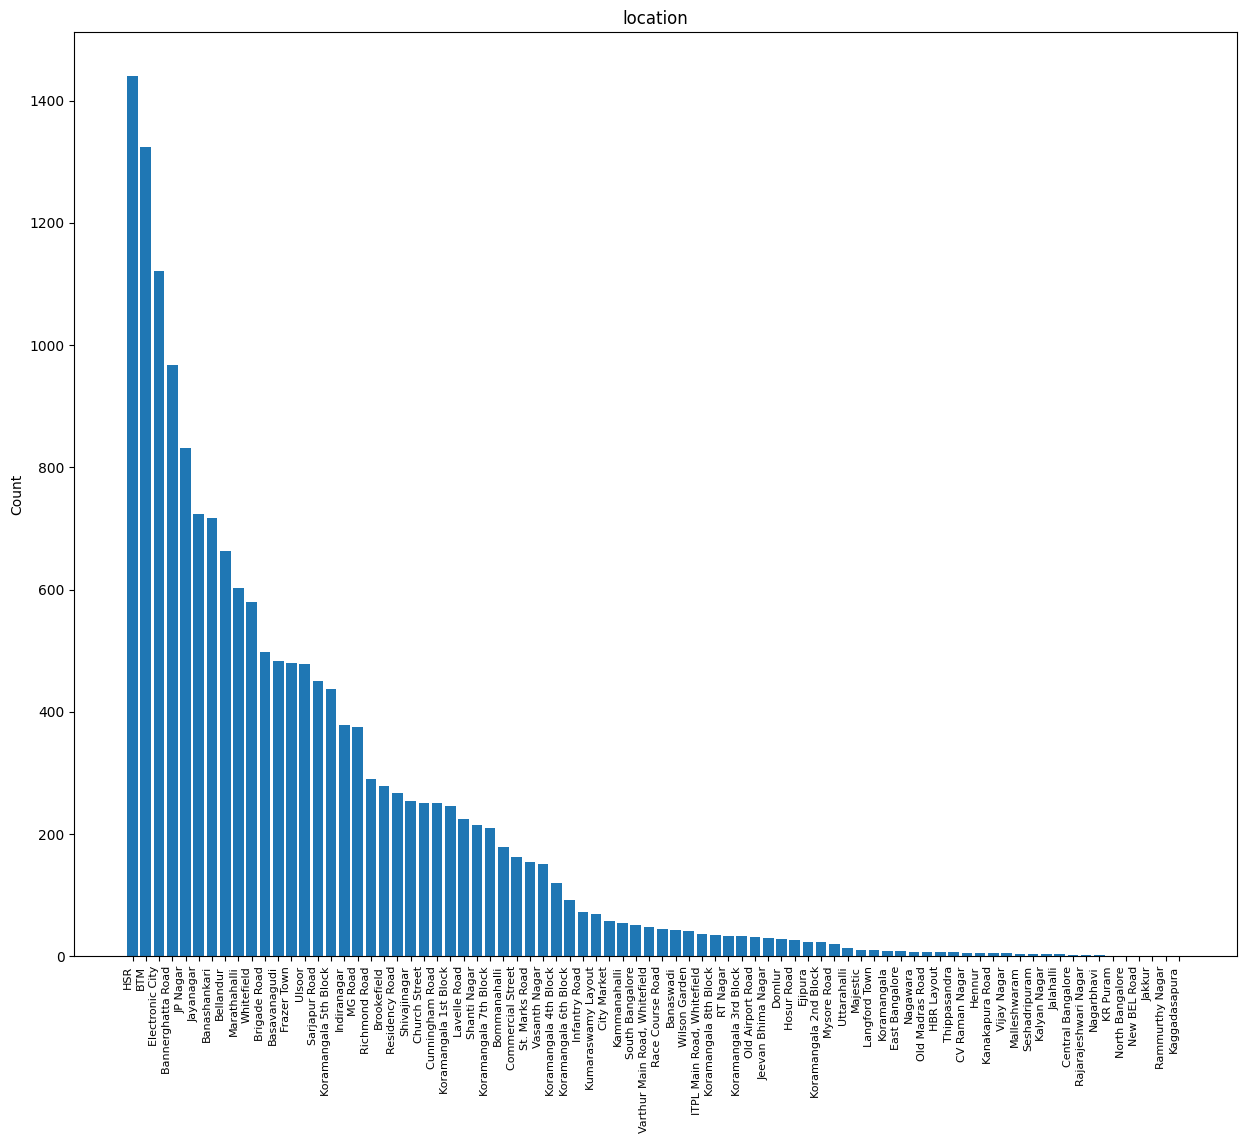

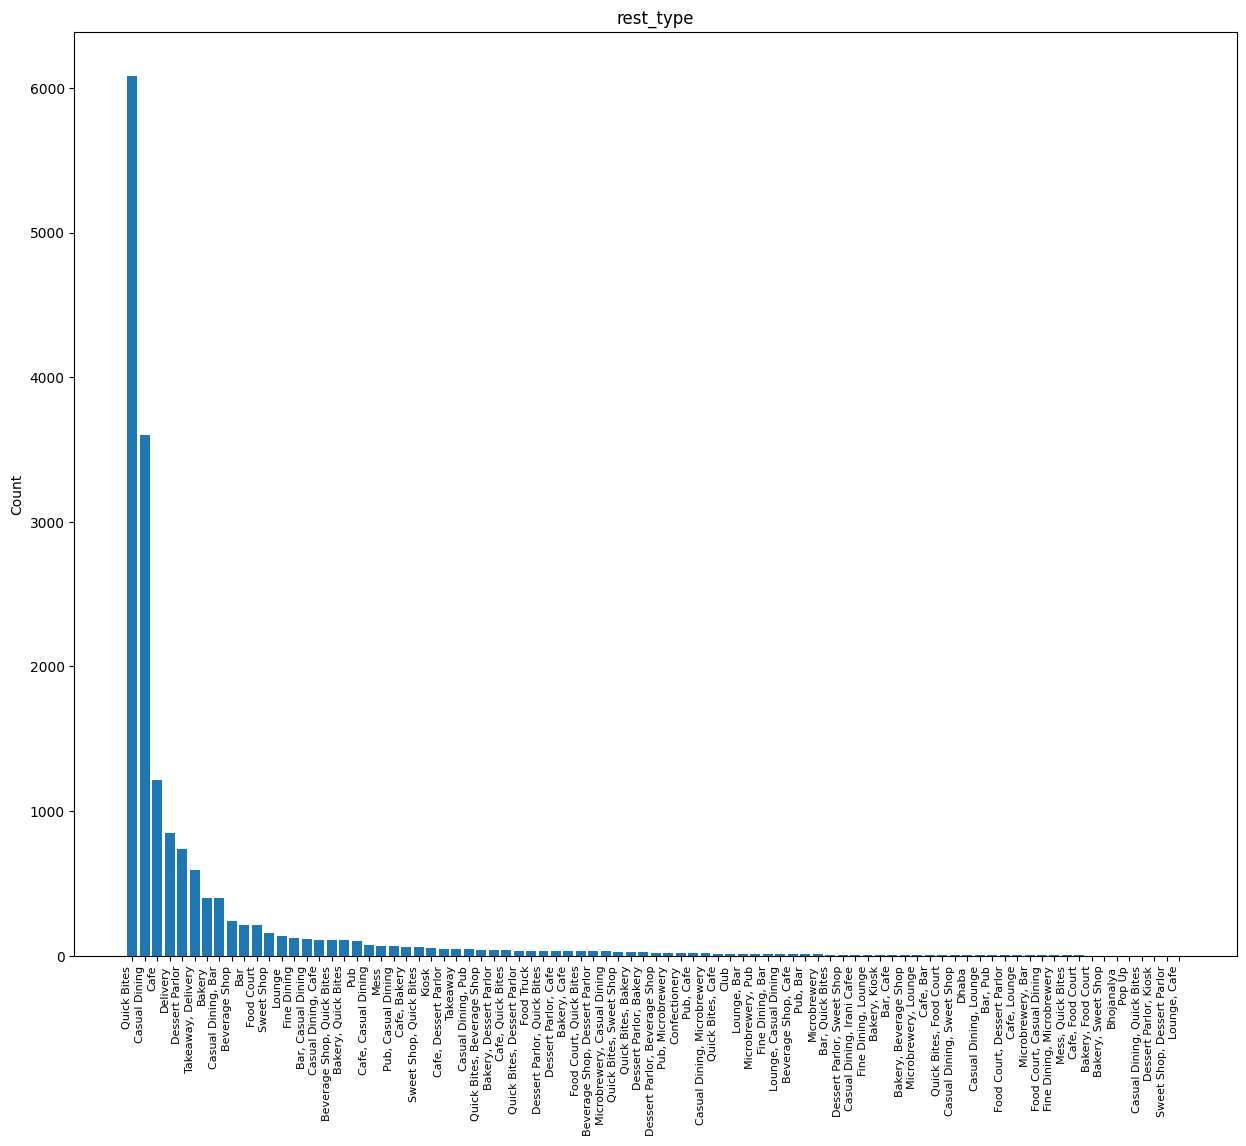

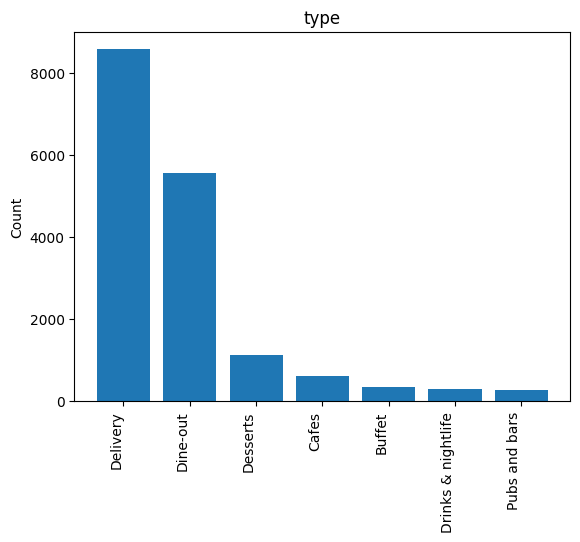

In [51]:
def plot_object_columns(df, selected_columns):

    object_columns = [col for col in selected_columns if df[col].dtype == np.object]

    for column_name in object_columns:
        value_counts = df[column_name].value_counts()

        if len(value_counts) >= 10:
            plt.figure(figsize=(15, 12))
            plt.xticks(rotation=90, ha="right", fontsize=8)
        else:
            plt.xticks(rotation=90, ha="right")

        plt.bar(value_counts.index, value_counts.values)
        plt.ylabel('Count')
        plt.title(column_name)
        plt.show()

object_columns_to_plot = ['location', 'rest_type', 'type']
plot_object_columns(df, object_columns_to_plot)

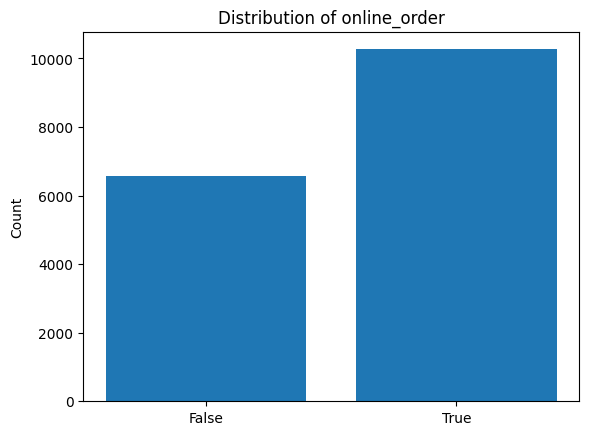

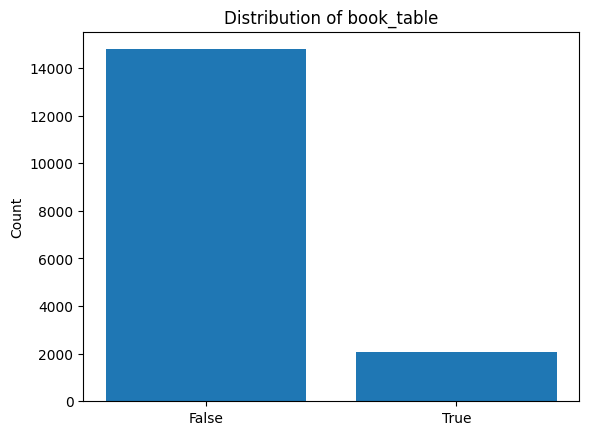

In [52]:
def plot_bool_columns(df):

    bool_columns = df.select_dtypes(include=[np.bool]).columns

    for column_name in bool_columns:
        value_counts = df[column_name].value_counts()

        plt.bar(value_counts.index, value_counts.values)
        plt.ylabel('Count')
        plt.title(f'Distribution of {column_name}')
        plt.xticks([True, False], ['True', 'False'])
        plt.show()

plot_bool_columns(df)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['reviews_list'])

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def get_recommendations(df, title):
    idx = df.index[df['name'] == title].tolist()[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = [score for score in sim_scores if df['name'].iloc[score[0]] != title]

    recommended_restaurants = []
    seen_names = set()
    for score in sim_scores:
        if len(recommended_restaurants) == 5:
            break
        restaurant_name = df['name'].iloc[score[0]]
        if restaurant_name not in seen_names:
            recommended_restaurants.append(restaurant_name)
            seen_names.add(restaurant_name)

    return recommended_restaurants

df_copied = df.copy()
recommended_restaurants = get_recommendations(df_copied, 'Jalsa')

recommended_restaurants

['Jalsa Gold',
 'Cafe @ Elanza',
 'The Hidden Home',
 'Foxtrot',
 'The Dining Table - Sahar Pavillion']

In [55]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense

tf.config.run_functions_eagerly(True)

train_data = df.dropna(subset=['rate'])
test_data = df[df['rate'].isnull()]

train_data['combined_reviews'] = train_data['reviews_list'].str.join(' ')
test_data['combined_reviews'] = test_data['reviews_list'].str.join(' ')

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['combined_reviews'])
train_sequences = tokenizer.texts_to_sequences(train_data['combined_reviews'])
test_sequences = tokenizer.texts_to_sequences(test_data['combined_reviews'])

train_input = pad_sequences(train_sequences, maxlen=300)
test_input = pad_sequences(test_sequences, maxlen=300)

model = Sequential()
model.add(Embedding(10000, 128, input_length=300))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

model.fit(train_input, train_data['rate'].values, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
354/354 [==============================] - 31s 88ms/step - loss: 0.5599 - mae: 0.4618 - val_loss: 0.1916 - val_mae: 0.3577
Epoch 2/10
354/354 [==============================] - 31s 87ms/step - loss: 0.1977 - mae: 0.3546 - val_loss: 0.1850 - val_mae: 0.3436
Epoch 3/10
354/354 [==============================] - 31s 87ms/step - loss: 0.2020 - mae: 0.3547 - val_loss: 0.1828 - val_mae: 0.3403
Epoch 4/10
354/354 [==============================] - 31s 88ms/step - loss: 0.1971 - mae: 0.3525 - val_loss: 0.1872 - val_mae: 0.3507
Epoch 5/10
354/354 [==============================] - 31s 88ms/step - loss: 0.1951 - mae: 0.3503 - val_loss: 0.1845 - val_mae: 0.3399
Epoch 6/10
354/354 [==============================] - 31s 88ms/step - loss: 0.1950 - mae: 0.3502 - val_loss: 0.1826 - val_mae: 0.3436
Epoch 7/10
354/354 [==============================] - 31s 88ms/step - loss: 0.1935 - mae: 0.3488 - val_loss: 0.1842 - val_mae: 0.3393
Epoch 8/10
354/354 [==============================] - 32s 90ms

In [57]:
predicted_rates = model.predict(test_input)

print(predicted_rates[:10])

84/84 [==============================] - 2s 22ms/step
[[3.7777169]
 [3.7078414]
 [3.411034 ]
 [3.411034 ]
 [3.411034 ]
 [3.411034 ]
 [3.7483227]
 [3.411034 ]
 [3.7422836]
 [3.411034 ]]


In [58]:
from sklearn.metrics import mean_absolute_error

train_predicted_rates = model.predict(train_input)

mae = mean_absolute_error(train_data['rate'].values, train_predicted_rates)
print(f"Mean Absolute Error on Training Data: {mae}")

443/443 [==============================] - 10s 23ms/step
Mean Absolute Error on Training Data: 0.34258984369154444
